### LAPORAN AKHIR PROYEK
##### Nama	: Rizqi Hairunnisa
##### NIM	: 09011282126118
##### MK	: Kecerdasan Buatan
##### Kelas	: SK 5C


# <center>Handwritten Digits Recognition Using Convolutional Neural Network</center>

1)	Objek	: Tulisan tangan manusia digit 0-9
2)	Pendekatan	: Convolutional Neural Network (CNN)
3)	Dataset	: MNIST - https://www.kaggle.com/datasets/oddrationale/mnist-in-c
4)	Refrensi : https://www.ijert.org/research/multi-digit-number-classification-using-mnist-and-ann-IJERTV9IS050330.pdfv


Bertujuan untuk mengidentifikasi/ memprediksi digit tulisan tangan dengan melakukan pengenalan pola fitur menggunakan metode Convolutional Neural Network. CNN adalah salah satu jenis Artificial Neural Network (ANN) yang dirancang khusus untuk image processing.

## Arsitektur Convolutional Neural Network

![](cnn.png)

Model CNN dibangun untuk mengenali tulisan tangan. Tidak seperti ANN yang masih memerlukan ekstraksi fitur secara manual (kita bisa memilih metode yang akan dipakai seperti, HOG, dll), CNN tidak perlu ekstraksi manual. Proses ekstraksi sudah include langsung di algoritmanya. Jadi kita tinggal menentukan seberapa banyak iterasi yang akurasinya paling tinggi untuk training modelnya.

1. `Layer Konvolusi (Convolutional Layer)`:
    Layer ini menggunakan filter konvolusi untuk mengekstrak fitur-fitur dari gambar. Setiap filter mengidentifikasi pola dan fitur dalam citra, seperti tepi, sudut, atau tekstur.

2. `Layer Pooling (Pooling Layer)`:
    Layer ini mengurangi dimensi citra dengan mengambil nilai rata-rata atau maksimum dari wilayah tertentu dalam gambar. Ini membantu mengurangi komputasi dan mencegah overfitting.

3. `Layer Aktivasi (Activation Layer)`:
    Setelah konvolusi atau pooling, layer aktivasi (biasanya ReLU) diterapkan untuk memasukkan non-linearitas ke dalam jaringan. Ini akan membuat jaringan untuk mempelajari hubungan non-linear antara fitur-fitur.

4. `Layer Normalisasi (Normalization Layer)`:
    Beberapa arsitektur CNN dapat mencakup layer normalisasi seperti Batch Normalization untuk memperbaiki konvergensi dan stabilitas pelatihan.

5. `Layer Fully Connected (Fully Connected Layer)`:
    Ini adalah layer yang terhubung sepenuhnya, mirip dengan layer di jaringan saraf biasa. Ini digunakan untuk menggabungkan fitur-fitur yang telah diekstraksi dan menghasilkan output yang digunakan untuk klasifikasi atau regresi.

6. `Softmax Layer`:
Layer ini digunakan untuk menghasilkan probabilitas prediksi untuk berbagai kelas dalam tugas klasifikasi.
Ini mengubah skor output menjadi distribusi probabilitas.


## Alur Proses Keseluruhan

![](alur2.png)

### Alur Image Processing

![](alur.png)

In [89]:
# Library yang dibutuhkan:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
import keras.utils
from keras import utils as np_utils
from keras import backend as K
import matplotlib.pyplot as plt 
%matplotlib inline 

##### SetUp Tensorflow GPU agar proses training lebih cepat (opsional)
https://www.tensorflow.org/install/pip

In [2]:
# Test GPU 
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

## Deskripsi Data

In [4]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
len(X_train), len(X_test)

(60000, 10000)

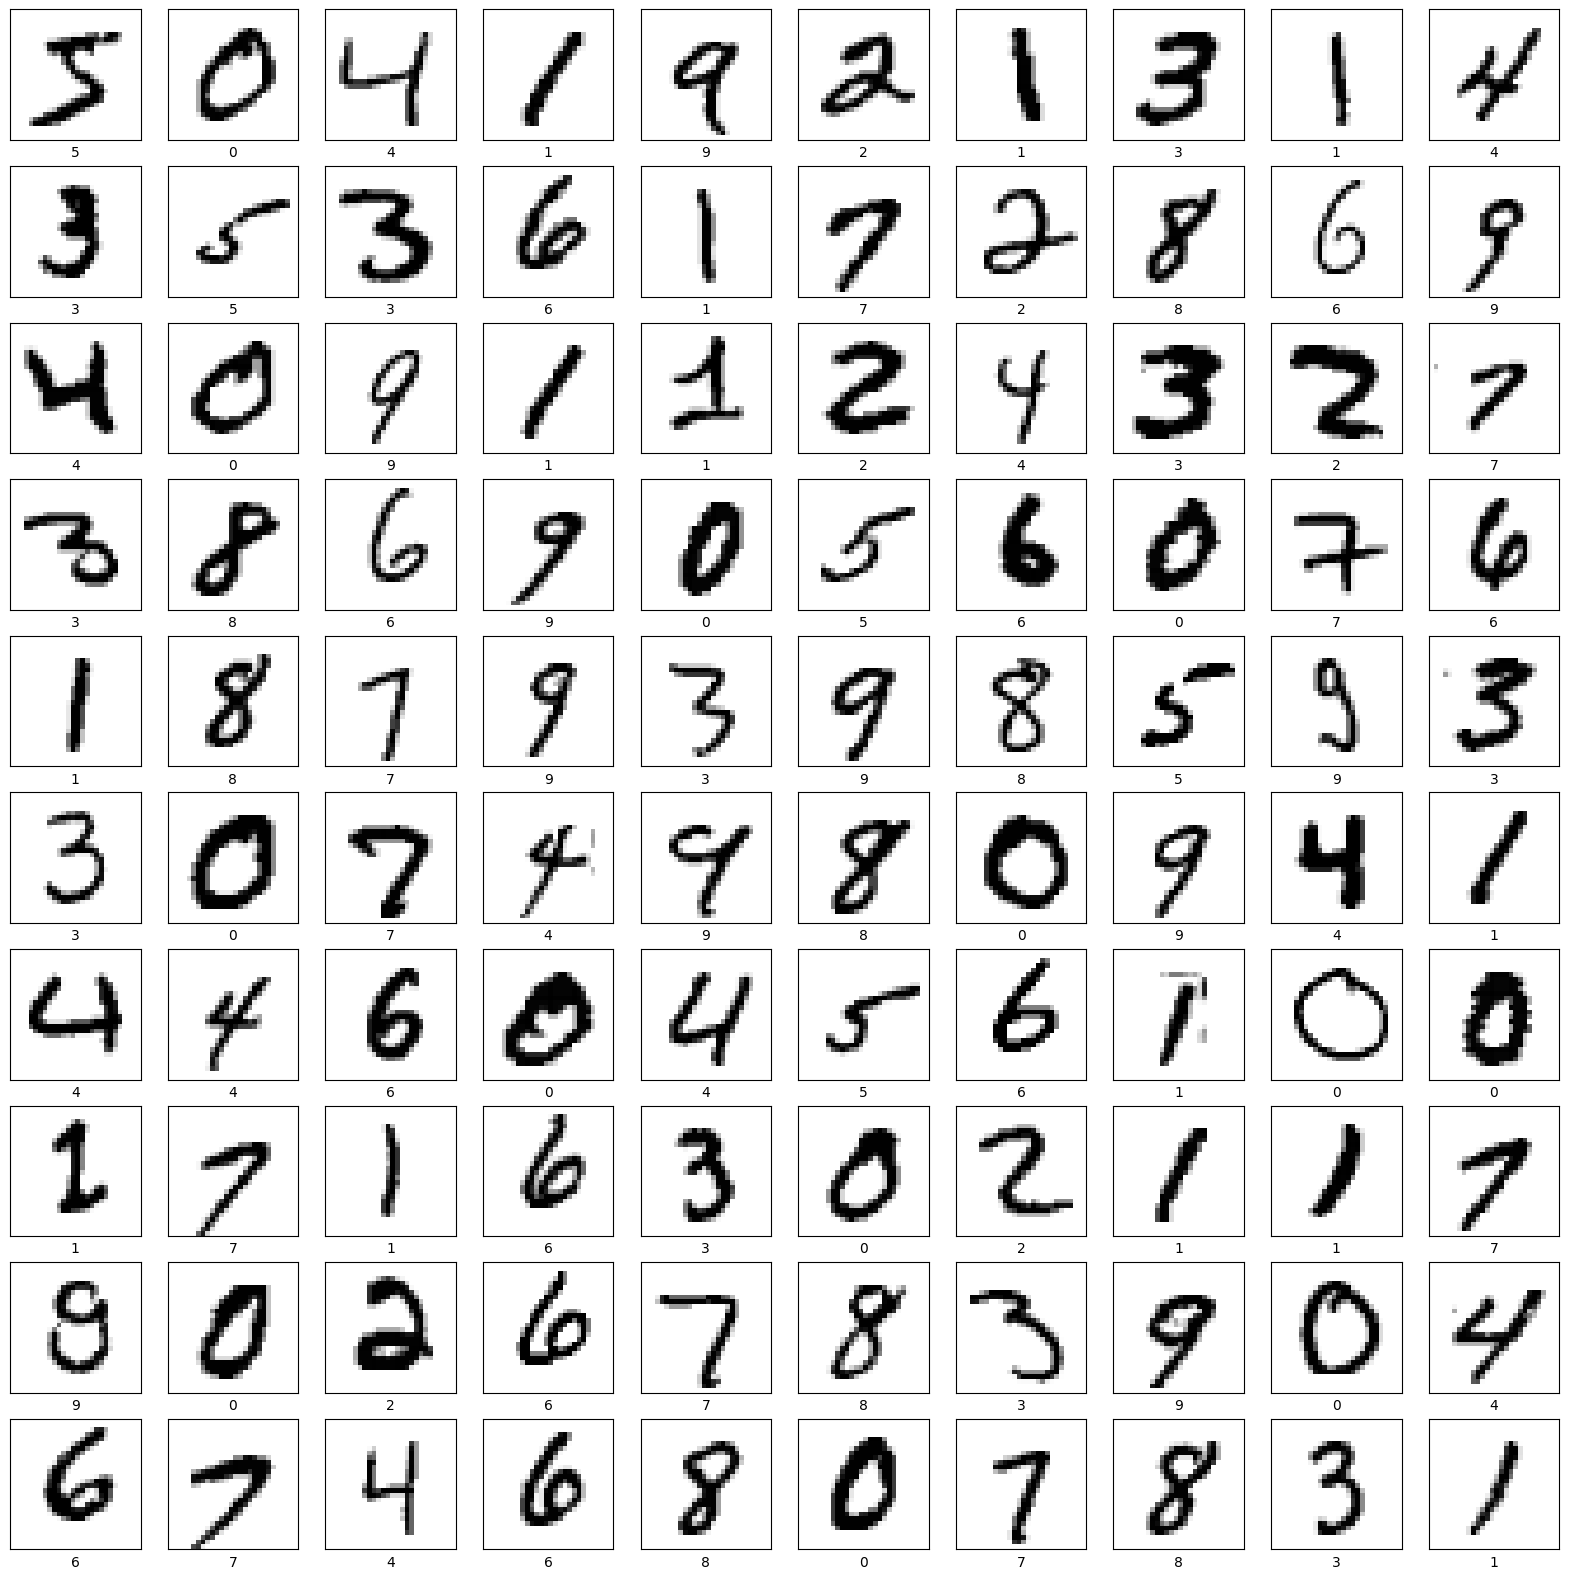

In [6]:
import math

numbers_to_display = 100
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(20,20))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

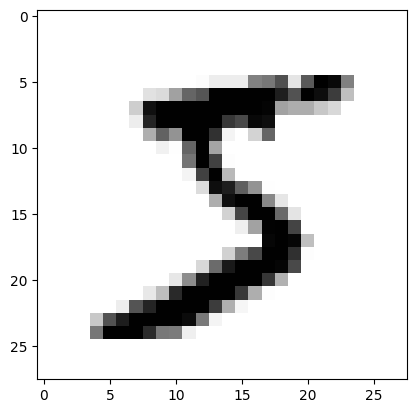

In [7]:
plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.show()

In [8]:
X_train[0].shape, X_test[0].shape

((28, 28), (28, 28))

Dataset yang akan digunakan pada Projek Akhir 'Deteksi Tulisan Tangan Digit (0-9)' ini adalah 'Dataset MNIST'. Secara total terdiri dari 70.000 gambar tulisan tangan digit (0-9) ukuran 28x28 pixel per gambar Dengan rincian, 60.000 gambar dipersiapkan untuk training data dan 10.000 gambar untuk testing yang akan digunakan untuk melatih model CNN. Dataset terdiri dari 785 baris: baris pertama adalah label (angka dari 0 hingga 9) dan baris ke-2 sampai ke-784 adalah nilai piksel (angka dari 0 hingga 255). 

## Sebaran Data

In [9]:
digits = ["0","1","2","3","4","5","6","7","8","9"] #definisikan semua karakter y
digits = np.array(digits) # mengubah list kebentuk numpy array.

In [10]:
(unique_label, total_label_train) = np.unique(y_train, return_counts=True)
(unique_label, total_label_test) = np.unique(y_test, return_counts=True)

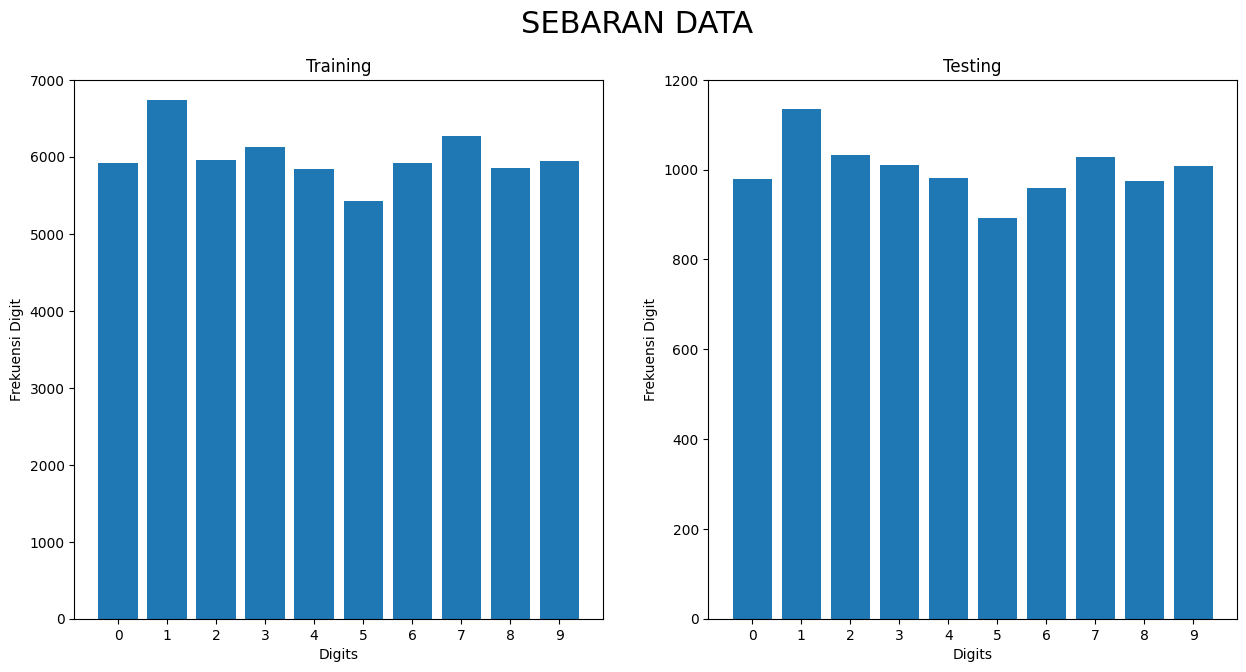

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('SEBARAN DATA', fontsize = 22)
fig.set_figheight(7)
fig.set_figwidth(15)

ax1.bar(np.array(digits), total_label_train)
ax1.set_title("Training")
ax1.set_ylim([0, 7000])
ax1.set_ylabel("Frekuensi Digit")
ax1.set_xlabel("Digits")

ax2.bar(np.array(digits), total_label_test)
ax2.set_title("Testing");
ax2.set_ylim([0, 1200])
ax2.set_ylabel("Frekuensi Digit")
ax2.set_xlabel("Digits");

Gambar diatas menjelaskan tentang Sebaran data untuk mengetahui data distribusinya. Dapat dilihat bahwa pada data training dan data testingnya, tiap digit memiliki proporsi yang Balance/ imbang. Tidak ada yang terlalu sedikit/ terlalu banyak.

## Prepocessing

1. Scalling data untuk memastikan bahwa berbagai fitur atau variabel memiliki skala yang serupa
2. Tidak perlu melakukan data split karena. Dataset yang dipakai telah displit. Jadi bisa langsung ditraining


In [12]:
X_train_scale = X_train / 255
X_test_scale = X_test / 255

Dilakukan adalah fitur scaling, dengan mengubah
rentang pixel dari 0-255 menjadi 0-1

### Nilai Sebelum Scaling

In [13]:
X_train[0] #Ambil contoh dari dataset index ke 0, kalau ditampilin semua tidak kelihatan soalnya.

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Nilai Setelah Scaling

In [14]:
X_train_scale[0] #Ambil contoh dari dataset index ke 0, kalau ditampilin semua tidak kelihatan soalnya.

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
input_shape = (28, 28, 1)

Dapat dilihat nilai berubah menjadi rentang 0-1 saja

## Modelling

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

In [17]:
# conversion of class vectors to matrices of  binary class 
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [39]:
batch_size = 64
num_classes=10
epochs = 1000
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

## Model Training

In [40]:
tf.config.run_functions_eagerly(True)

In [41]:
hist = model.fit(X_train_scale, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test_scale, y_test))
print("Model berhasil ditraining")
model.save('mnist1.h5')
print("Menyimpan model mnist.h5")

Epoch 1/1000
938/938 [==============================] - 22s 23ms/step - loss: 2.2658 - accuracy: 0.1678 - val_loss: 2.2074 - val_accuracy: 0.4367
Epoch 2/1000
938/938 [==============================] - 23s 24ms/step - loss: 2.1659 - accuracy: 0.3515 - val_loss: 2.0738 - val_accuracy: 0.7109
Epoch 3/1000
938/938 [==============================] - 23s 24ms/step - loss: 2.0089 - accuracy: 0.5117 - val_loss: 1.8551 - val_accuracy: 0.7622
Epoch 4/1000
938/938 [==============================] - 22s 24ms/step - loss: 1.7621 - accuracy: 0.6030 - val_loss: 1.5307 - val_accuracy: 0.7849
Epoch 5/1000
938/938 [==============================] - 23s 24ms/step - loss: 1.4610 - accuracy: 0.6532 - val_loss: 1.1816 - val_accuracy: 0.8058
Epoch 6/1000
938/938 [==============================] - 23s 24ms/step - loss: 1.1948 - accuracy: 0.6904 - val_loss: 0.9183 - val_accuracy: 0.8238
Epoch 7/1000
938/938 [==============================] - 28s 30ms/step - loss: 1.0086 - accuracy: 0.7210 - val_loss: 0.7513 -

### Evaluasi

In [42]:
score = model.evaluate(X_test_scale, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02990695834159851
Test accuracy: 0.9896000027656555


Hasil tes akurasi menunjukkan hasil yang amat baik yakni mencapai 99% persen akurasi

In [54]:
y_pred = model.predict(X_test)

  1/313 [..............................] - ETA: 25s

C:\Users\62877\miniconda3\envs\py310\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 2s 5ms/step


In [56]:
y_test = y_test.astype(int)  
y_pred = y_pred.astype(int) 

In [52]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [68]:
# Confusion Matrix for the testing set
ml_cm = multilabel_confusion_matrix(y_test, y_pred)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.99      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 samples avg       0.99      0.99      1.00     10000



1. `Precision`: Merepresentasikan seberapa banyak dari instance yang diklasifikasikan sebagai positif oleh model yang memang benar positif. Precision dihitung dengan rumus: true positives / (true positives + false positives). Semakin tinggi precision, semakin baik model dalam mengidentifikasi kelas tertentu tanpa banyak kesalahan positif palsu.

2. `Recall (Sensitivitas atau True Positive Rate)`: Merepresentasikan seberapa banyak dari instance positif yang sebenarnya berhasil diidentifikasi oleh model. Recall dihitung dengan rumus: true positives / (true positives + false negatives). Semakin tinggi recall, semakin baik model dalam menemukan semua instance positif yang sebenarnya.

3. `F1-Score`: Merupakan nilai rata-rata harmonis antara precision dan recall. F1-score memberikan keseimbangan antara precision dan recall. F1-score yang tinggi menunjukkan performa yang baik pada kedua metrik tersebut.

4. `Support`: Merupakan jumlah instance aktual dari kelas tertentu dalam dataset pengujian.

5. `Micro Average`: Menghitung metrik secara agregat dari semua kelas, di mana setiap instance dan prediksi dihitung.

6. `Macro Average`: Menghitung metrik secara rata-rata dari semua kelas tanpa memperhitungkan ketidakseimbangan jumlah instance di setiap kelas.

7. `Weighted Average`: Mirip dengan macro average, tetapi memperhitungkan ketidakseimbangan jumlah instance di setiap kelas.

8. `Samples Average`: Digunakan dalam kasus multilabel classification, menghitung metrik untuk setiap instance, lalu diambil rata-rata.

Dari nilai-nilai yang ditampilkan, terlihat bahwa model memiliki performa yang sangat baik dengan nilai precision, recall, dan f1-score yang tinggi untuk setiap kelas. Nilai micro, macro, dan weighted average juga menunjukkan kinerja keseluruhan yang baik.

In [75]:
# Calculate accuracy and sensitivity for each label
accuracies = []
sensitivities = []

for i in range(len(ml_cm)):
    TP = ml_cm[i, 1, 1]
    TN = ml_cm[i, 0, 0]
    FP = ml_cm[i, 0, 1]
    FN = ml_cm[i, 1, 0]

    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) != 0 else 1  # Handle division by zero
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 1  # Handle division by zero

    accuracies.append(accuracy)
    sensitivities.append(sensitivity)

    print(f"Label {i}: Accuracy = {accuracy:.4f}, Sensitivity = {sensitivity:.4f}")

Label 0: Accuracy = 0.9975, Sensitivity = 0.9959
Label 1: Accuracy = 0.9986, Sensitivity = 0.9965
Label 2: Accuracy = 0.9977, Sensitivity = 0.9884
Label 3: Accuracy = 0.9981, Sensitivity = 0.9901
Label 4: Accuracy = 0.9986, Sensitivity = 0.9949
Label 5: Accuracy = 0.9981, Sensitivity = 0.9854
Label 6: Accuracy = 0.9982, Sensitivity = 0.9875
Label 7: Accuracy = 0.9968, Sensitivity = 0.9864
Label 8: Accuracy = 0.9975, Sensitivity = 0.9836
Label 9: Accuracy = 0.9970, Sensitivity = 0.9772


`Label 0`:
Accuracy = 0.9975: Model memiliki akurasi sekitar 99.75% dalam mengidentifikasi instance dari Label 0.
Sensitivity = 0.9959: Sebanyak 99.59% dari instance positif dari Label 0 berhasil diidentifikasi oleh model.

`Label 1`:
Accuracy = 0.9986: Model memiliki akurasi sekitar 99.86% dalam mengidentifikasi instance dari Label 1.
Sensitivity = 0.9965: Sebanyak 99.65% dari instance positif dari Label 1 berhasil diidentifikasi oleh model.

`Label 2`:
Accuracy = 0.9977: Model memiliki akurasi sekitar 99.77% dalam mengidentifikasi instance dari Label 2.
Sensitivity = 0.9884: Sebanyak 98.84% dari instance positif dari Label 2 berhasil diidentifikasi oleh model.

...dan seterusnya untuk setiap label.

### Visualisasi Confusion Matrix

True Positives (TP): Jumlah observasi yang sebenarnya positif dan telah diprediksi dengan benar sebagai positif oleh model.

True Negatives (TN): Jumlah observasi yang sebenarnya negatif dan telah diprediksi dengan benar sebagai negatif oleh model.

False Positives (FP): Jumlah observasi yang sebenarnya negatif, tetapi keliru diprediksi sebagai positif oleh model. (Juga dikenal sebagai Type I error)

False Negatives (FN): Jumlah observasi yang sebenarnya positif, tetapi keliru diprediksi sebagai negatif oleh model. (Juga dikenal sebagai Type II error)error)

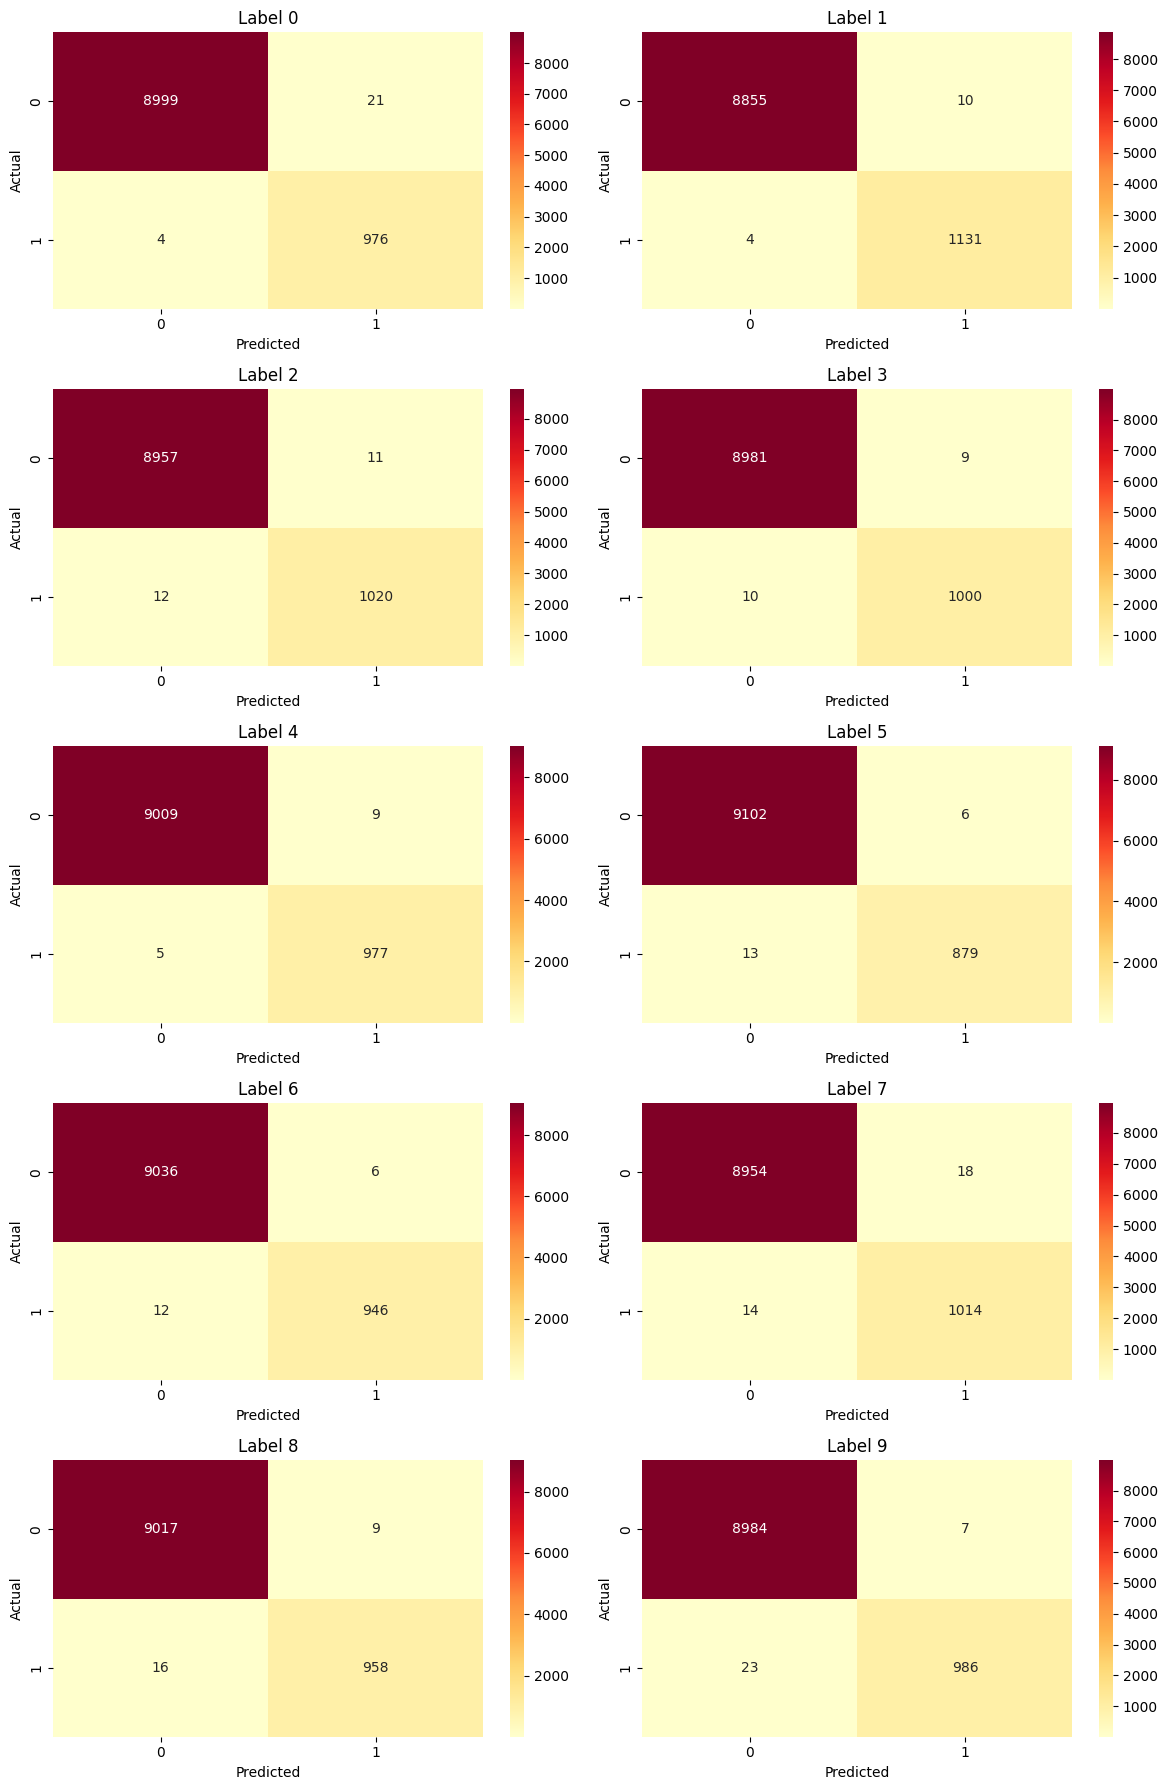

In [79]:
# Visualisasi
fig, axes = plt.subplots(5, 2, figsize=(12, 18))

for i, ax in enumerate(axes.flatten()):
    sns.heatmap(ml_cm[i], annot=True, fmt='d', cmap='YlOrRd', ax=ax)
    ax.set_title(f'Label {i}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

`Label 0`:
TN = 8999: Ada 8999 observasi yang sebenarnya negatif dan telah diprediksi dengan benar sebagai negatif.
TP = 976: Ada 976 observasi yang sebenarnya positif dan telah diprediksi dengan benar sebagai positif

FN = 4: Ada 4 observasi yang sebenarnya positif, tetapi keliru diprediksi sebagai negatf.

FP = 21: Ada 21 observasi yang sebenarnya negatif, tetapi keliru diprediksi sebagai positif.


...dan seterusnya untuk setiap label.

### Testing untuk prediksi melalui GUI

In [65]:
from tensorflow.keras.models import load_model

# Load the model using TensorFlow's load_model
model = load_model("mnist1.h5")

In [44]:
model.save("mnist1_tf", save_format="tf")

INFO:tensorflow:Assets written to: mnist1_tf\assets


INFO:tensorflow:Assets written to: mnist1_tf\assets


In [100]:
import tkinter as tk
from tkinter import Canvas, Button, Label
from PIL import ImageGrab, Image
import numpy as np
from tensorflow.keras.models import load_model

class HandwrittenDigitRecognitionApp(tk.Tk):
    def __init__(self, model_path):
        tk.Tk.__init__(self)
        self.model = load_model(model_path)
        self.title("Handwritten Digit Recognition")

        self.canvas_size = 28
        self.cell_size = 10  # Adjust the cell size as needed
        self.image_data = np.zeros((self.canvas_size, self.canvas_size), dtype=np.uint8)

        self.canvas = Canvas(self, width=self.canvas_size * self.cell_size, height=self.canvas_size * self.cell_size, bg="white", cursor="cross")
        self.canvas.pack()

        self.label = Label(self, text="Draw a digit", font=("Helvetica", 16))
        self.label.pack()

        self.classify_btn = Button(self, text="Recognize", command=self.classify_handwriting)
        self.classify_btn.pack()

        self.clear_btn = Button(self, text="Clear", command=self.clear_canvas)
        self.clear_btn.pack()

        self.drawing = False

        self.canvas.bind("<B1-Motion>", self.paint)
        self.canvas.bind("<ButtonRelease-1>", self.reset)

    def paint(self, event):
        cell_x = event.x // self.cell_size
        cell_y = event.y // self.cell_size

        # Draw on the canvas
        self.canvas.create_rectangle(cell_x * self.cell_size, cell_y * self.cell_size,
                                     (cell_x + 1) * self.cell_size, (cell_y + 1) * self.cell_size,
                                     fill="black", outline="black", width=5)

        # Update the image data
        self.image_data[cell_y, cell_x] = 1

    def reset(self, event):
        # End drawing
        self.drawing = False

    def classify_handwriting(self):
        im = Image.fromarray(self.image_data * 255, mode='L')
        im = im.resize((28, 28))
        im = np.array(im)
        im = im.reshape(1, 28, 28, 1)
        im = im / 255.0

        prediction = self.model.predict(im)
        digit = np.argmax(prediction)

        self.label.configure(text=f"Predicted digit: {digit}")

    def clear_canvas(self):
        # Clear the canvas and reset image data
        self.canvas.delete("all")
        self.image_data = np.zeros((self.canvas_size, self.canvas_size), dtype=np.uint8)
        self.label.configure(text="Draw a digit")


if __name__ == "__main__":
    app = HandwrittenDigitRecognitionApp(model_path="mnist1_tf")
    app.mainloop()



C:\Users\62877\miniconda3\envs\py310\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 [==============================] - 0s 78ms/step


### Hasil Prediksi

![](hasil.png)

### Kesimpulan

Percobaan berhasil mengidentifikasi/ memprediksi digit tulisan tangan dari inputan GUI dari model yang telah dihasilkan. Akurasi model sangat tinggi mencapai 99%